### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

In [1]:
# import libraries and read in data

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import time
%matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


__Independent variable__: the type/condition of the task - if words match the colour (congruent) or do not match (incongruent)

__Dependent variable__: the time to name the colours in the list

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$H_0: \mu_{congruent} - \mu_{incongruent} = 0$

$H_1: \mu_{congruent} - \mu_{incongruent} \neq 0$

__Null Hypothesis ($H_0$)__: there is no difference between the mean times for the congruent task and the incongruent task

__Alternative Hypothesis ($H_1$)__: there is a difference between the mean times for the congruent task and the incongruent task

__Explanation__: Since we are interested in whether there is a difference or not, we set the null hypothesis as there being no difference. Then we will use hypothesis testing to see that assuming the null is true, if there is sufficient evidence to reject the null hypothesis, in favour of the alternative hypothesis (that there is a difference between the groups)

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [6]:
# Perform the analysis here
# descriptive statistics
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [7]:
# interquartile range
print(16.200750-11.895250)
print(24.051500-18.716750)

4.3054999999999986
5.33475


In [8]:
# variance
np.var(df)

Congruent      12.141153
Incongruent    22.052934
dtype: float64

In [5]:
# standard deviation
np.std(df)

Congruent      3.484416
Incongruent    4.696055
dtype: float64

Descriptive Statistics:

|      group| n|  mean|   min|   max|interquartile range|variance|standard deviation|
|-----------|--|------|------|------|-------------------|--------|------------------|
|  congruent|24|14.051| 8.630|22.328|              4.305|  12.141|             3.484|
|incongruent|24|22.016|15.687|35.255|              5.335|  22.053|             4.696|

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

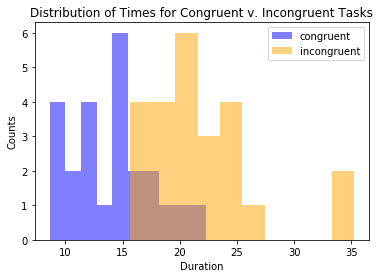

In [12]:
# Build the visualizations here
plt.hist(df['Congruent'], alpha=0.5, color='blue', label='congruent');
plt.hist(df['Incongruent'], alpha=0.5, color='orange', label='incongruent');
plt.legend();
plt.xlabel('Duration');
plt.ylabel('Counts');
plt.title('Distribution of Times for Congruent v. Incongruent Tasks');

Plotted a histogram of the time values for each group, congruent (blue) and incongruent (orange).

Observations:
- The congruent times tend more to the left (lower in general)
- The incongruent times tend more to the right (higher in general)
- The distribution is uneven (not exactly normal shaped) since there n=24 which is small for each group. Both appear to be right-skewed.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [17]:
# Perform the statistical test here

# add a column to store differences between the 2 groups
df['difference'] = df['Congruent'] - df['Incongruent']
df.head()

,Congruent,Incongruent,difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


In [19]:
# bootstrap from the sample data
mean_congruent, mean_incongruent, mean_diff = [], [], []
for _ in range(10000):
    bootsample = df.sample(100, replace=True)
    congruent = bootsample['Congruent'].mean()
    incongruent = bootsample['Incongruent'].mean()
    mean_congruent.append(congruent)
    mean_incongruent.append(incongruent)
    mean_diff.append(congruent - incongruent)

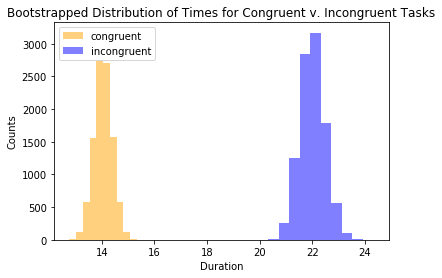

In [24]:
plt.hist(mean_congruent, color='orange', alpha=0.5, label='congruent');
plt.hist(mean_incongruent, color='blue', alpha=0.5, label='incongruent');
plt.legend();
plt.xlabel('Duration');
plt.ylabel('Counts');
plt.title('Bootstrapped Distribution of Times for Congruent v. Incongruent Tasks');

In [33]:
# sample from the null
null_vals = np.random.normal(0, np.std(mean_diff), 10000)

In [34]:
null_mean = null_vals.mean()
sample_mean = df['difference'].mean()
lower_bound = sample_mean
upper_bound = null_mean + (null_mean - sample_mean)
print(lower_bound, upper_bound)

-7.964791666666666 7.952983853339586


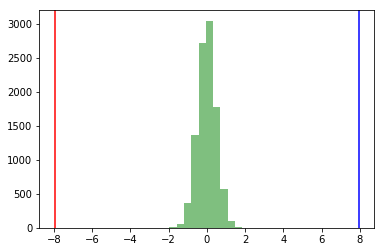

In [40]:
plt.hist(null_vals, color='green', alpha=0.5, label='null');

# add a line for the calculated sample difference mean (lower bound) and upper bound
plt.axvline(x=lower_bound, color = 'red');
plt.axvline(x=upper_bound, color = 'blue');

In [36]:
# calculate p-value
prob_more_extreme_low = (null_vals < lower_bound).mean()
prob_more_extreme_high = (null_vals > upper_bound).mean()
pval = prob_more_extreme_low + prob_more_extreme_high

print(pval)

0.0


In [41]:
# calculate 95% confidence interval for the difference in means from the bootstrapped sample
low, upper = np.percentile(mean_diff, 2.5), np.percentile(mean_diff, 97.5)
print(low, upper)

-8.905871 -7.055872999999995


In [42]:
# calculate 99.99% confidence interval for the difference in means from the bootstrapped sample
low2, upper2 = np.percentile(mean_diff, 0.005), np.percentile(mean_diff, 99.995)
print(low2, upper2)

-9.892015276000002 -6.363923417999926


Test 1 - Simulate from the null, then compare the sample difference mean to that. From the plot above, we can see that the sample mean (the red line) is far to the left of the null distribution (green block) centered at 0. We calculated the p-value (the % chance that values generated from the null were more extreme than the actual value at lower and upper ends) and had a p-value of 0. So we have enough evidence to reject the null hypothesis, in favour of the alternative that there is a difference in means between the congruent and incongruent tasks. And from the negative value of congruent - incongruent, it appears that the mean for the incongruent condition is larger than for the congruent condition. 

Test 2 - Bootstrapped from the sample to calculate a 95% confidence interval of (-8.905871 -7.055872999999995), which definitely does not fall in the null hypothesis space of 0. Even the 99.99% confidence interval of (-9.892015276000002 -6.363923417999926) does not overlap with 0. This suggests to reject the null hypothesis in favour of the alternative, that the means for the congruent and incongruent groups are different, and that the incongruent mean is higher than the congruent mean.

The results matched the expectations from the Stroop test, that the incongruent task will result in a higher duration than the congruent task, due the mismatch of the colour and text in the incongruent task. 


(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

A possible explanation for the higher incongruent durations is that the default action when viewing text is to read the word instead of evaluating the colour. So when the word text and the colour are the same or similar, the viewer just reads the text and notes that the colour is the same. When the word text and the colour are different, the viewer reads the text, sees that the colour is not the same which creates 'interference' in the process, then has to think of the correct colour. This adds time to the incongruent task. 

Similar tasks: 
- the numerical stroop (from Wikipedia) where the viewer compares digits where the size of the digit text can match (congruent - larger size matches larger digit) or mismatch (incongruent - larger size matches smaller digit)
- the implicit association test from psychology where subjects take longer to match positive characteristics to certain races/gender/groups depending on whether the group has a positive or negative association


References: 

- https://en.wikipedia.org/wiki/Stroop_effect
- https://en.wikipedia.org/wiki/Implicit_stereotype
- https://en.wikipedia.org/wiki/Implicit-association_test
